# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## Leitura da base de dados do repositório remoto.

In [2]:
# Leitura da base de dados
df = pd.read_csv("../data/raw/doencas_cardiacas.csv")

## Glossário de Termos Médicos:

O glossário a seguir apresenta definições sobre os termos médicos, mais específicos, presentes no DataSet:

- **Açúcar no sangue em jejum**:  
  Nível de glicose medido no sangue do paciente durante o período de jejum. Valores superiores a 120 mg/dL podem indicar a presença de diabetes.

- **Angina**:  
  Dor no peito provocada pela falta de oxigenação do coração, que pode ser causada pelo estreitamento das artérias coronárias.

- **Colesterol**:  
  Tipo de gordura necessária para o funcionamento do corpo, mas que, em excesso, pode aumentar o risco de doenças cardiovasculares.

- **Depressão do segmento ST**:  
  Grau de desvio para baixo do segmento ST no eletrocardiograma do paciente durante o exercício, comparado ao estado de repouso. Indica possível isquemia (falta de oxigênio no coração).

- **ECG em repouso**:  
  Resultado de um eletrocardiograma realizado enquanto o paciente está em repouso, para avaliar a atividade elétrica do coração.

- **Taxa de batimentos máxima**:  
  Refere-se à **frequência cardíaca máxima**, a maior frequência alcançada pelo paciente durante o exercício ou esforço físico.

- **Inclinação do segmento ST**:  
  Direção do segmento ST no eletrocardiograma do paciente durante o exercício, indicando a reação do coração ao esforço:
  - **1** = Cima (indicativo de lesão cardíaca).
  - **2** = Plano (normalidade).
  - **3** = Baixo (indica isquemia, falta de sangue).

- **Segmento ST**:  
  Parte do eletrocardiograma que representa a atividade elétrica do coração entre a contração e o relaxamento dos ventrículos, ajudando na detecção de problemas cardíacos.

- **Tipo de dor no peito**:  
  Descrição da dor no peito experimentada pelo paciente. Pode ser:
  - **Angina típica ou clássica**: Dor no peito provocada pela redução do fluxo sanguíneo para o coração.
  - **Angina atípica**: Dor no peito com características diferentes da angina típica, como ocorrer em repouso.
  - **Dor não-anginosa**: Dor que não está relacionada a problemas cardíacos.
  - **Assintomático**: Não há dor no peito, mas o paciente pode ter outros sintomas cardíacos.

## 1. Descrição dos dados.

### Display do dicionário de dados.

In [3]:
dictionary = pd.read_csv("../data/external/dicionario.csv")
display(dictionary)

,Unnamed: 0,variavel,descrição,tipo,subtipo
0,0,age,Idade,Quantitativa,Discreta
1,1,sex,Sexo,Qualitativa,Nominal
2,2,chest pain type,Tipo de dor no peito,Qualitativa,Ordinal
3,3,resting bp s,Pressão arterial em repouso,Quantitativa,Contínua
4,4,cholesterol,Colesterol,Quantitativa,Contínua
5,5,fasting blood sugar,Açúcar no sangue em jejum > 120mg/dl,Qualitativa,Nominal
6,6,resting ecg,Eletrocardiograma em repouso,Qualitativa,Nominal
7,7,max heart rate,Frequência cardíaca máxima,Quantitativa,Contínua
8,8,exercise angina,Angina induzida por exercício,Qualitativa,Nominal
9,9,oldpeak,Depressão do segmento ST,Quantitativa,Contínua


### -Tratamento de dados.

In [4]:
## Mudando nome de colunas.
df.rename(columns = {
            "age" : "idade",
            "sex" : "sexo",
            "chest pain type" : "tipo de dor no peito",
            "resting bp s" : "batimento por segundo em repouso",
            "cholesterol" : "colesterol",
            "fasting blood sugar" : "açúcar no sangue em jejum",
            "resting ecg" : "ECG em repouso",
            "max heart rate" : "taxa de batimentos máxima",
            "exercise angina" : "angina em exercício",
            "oldpeak" : "depressão do segmento ST",
            "ST slope" : "inclinação do segmento ST",
            "target" : "alvo"
            }, inplace = True)

## Substituindo valores com replace.
df.replace({'sexo':{
            0: 'mulher',
            1: 'homem'
            }}, inplace = True)
df.replace({'tipo de dor no peito':{
            1: 'angina típica (clássica)',
            2: 'angina atípica',
            3: 'dor não-anginosa',
            4: 'assintomático'
            }}, inplace = True)
df.replace({'açúcar no sangue em jejum':{
            0: 'não',
            1: 'sim'
            }}, inplace = True)
df.replace({'ECG em repouso':{
            0: 'normal',
            1: 'anormalidade de onda ST-T',
            2: 'hipertrofia ventrícular esquerda provável (LVH)'
            }}, inplace = True)
df.replace({'angina em exercício':{
            0: 'não',
            1: 'sim'
            }}, inplace = True)
df.replace({'inclinação do segmento ST':{
            1: 'cima',
            2: 'plano',
            3: 'baixo'
            }}, inplace = True)
df.replace({'alvo':{
            0: 'não-cardíaco',
            1: 'cardíaco'
            }}, inplace = True)

## Validação do DataFrame.
display(df)

,idade,sexo,tipo de dor no peito,batimento por segundo em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
0,40,homem,angina atípica,140,289,não,normal,172,não,0.0,cima,não-cardíaco
1,49,mulher,dor não-anginosa,160,180,não,normal,156,não,1.0,plano,cardíaco
2,37,homem,angina atípica,130,283,não,anormalidade de onda ST-T,98,não,0.0,cima,não-cardíaco
3,48,mulher,assintomático,138,214,não,normal,108,sim,1.5,plano,cardíaco
4,54,homem,dor não-anginosa,150,195,não,normal,122,não,0.0,cima,não-cardíaco
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,homem,angina típica (clássica),110,264,não,normal,132,não,1.2,plano,cardíaco
1186,68,homem,assintomático,144,193,sim,normal,141,não,3.4,plano,cardíaco
1187,57,homem,assintomático,130,131,não,normal,115,sim,1.2,plano,cardíaco
1188,57,mulher,angina atípica,130,236,não,hipertrofia ventrícular esquerda provável (LVH),174,não,0.0,plano,cardíaco


### -Validação de tipos.

In [5]:
## Contagem de valores ausentes.
print("\nValores ausentes em cada coluna:")
display(df.isnull().sum())
print("\n")

# Exibe os tipos de cada coluna.
print("Tipos de dados de cada coluna:")
print(df.dtypes)
print("\n")

# Filtra as linhas duplicadas e conta a quantidade.
duplicate = df[df.duplicated()]
num_duplicate = duplicate.shape[0]

# Exibe as linhas duplicadas e a contagem.
print(f"\nNúmero total de linhas duplicadas: {num_duplicate}")


Valores ausentes em cada coluna:


idade                               0
sexo                                0
tipo de dor no peito                0
batimento por segundo em repouso    0
colesterol                          0
açúcar no sangue em jejum           0
ECG em repouso                      0
taxa de batimentos máxima           0
angina em exercício                 0
depressão do segmento ST            0
inclinação do segmento ST           0
alvo                                0
dtype: int64



Tipos de dados de cada coluna:
idade                                 int64
sexo                                 object
tipo de dor no peito                 object
batimento por segundo em repouso      int64
colesterol                            int64
açúcar no sangue em jejum            object
ECG em repouso                       object
taxa de batimentos máxima             int64
angina em exercício                  object
depressão do segmento ST            float64
inclinação do segmento ST            object
alvo                                 object
dtype: object



Número total de linhas duplicadas: 272


In [6]:
# Remove as linhas duplicadas do dataset
df.drop_duplicates().reset_index(drop = True)

# drop_duplicates remove as linhas duplicadas.
# reset_index reinicia os índices para que os índices vazios sejam removidas e reorganiza a lista.
# drop = True garante que o reset_index() não vai duplicar o coluna de índices.

,idade,sexo,tipo de dor no peito,batimento por segundo em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
0,40,homem,angina atípica,140,289,não,normal,172,não,0.0,cima,não-cardíaco
1,49,mulher,dor não-anginosa,160,180,não,normal,156,não,1.0,plano,cardíaco
2,37,homem,angina atípica,130,283,não,anormalidade de onda ST-T,98,não,0.0,cima,não-cardíaco
3,48,mulher,assintomático,138,214,não,normal,108,sim,1.5,plano,cardíaco
4,54,homem,dor não-anginosa,150,195,não,normal,122,não,0.0,cima,não-cardíaco
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homem,angina típica (clássica),110,264,não,normal,132,não,1.2,plano,cardíaco
914,68,homem,assintomático,144,193,sim,normal,141,não,3.4,plano,cardíaco
915,57,homem,assintomático,130,131,não,normal,115,sim,1.2,plano,cardíaco
916,57,mulher,angina atípica,130,236,não,hipertrofia ventrícular esquerda provável (LVH),174,não,0.0,plano,cardíaco


### -Primeiros prints.

In [7]:
## Prints de visualização do DataFrame.
print('Primeiras linhas:\n')
display(df.head())
print("\nÚltimas linhas:\n")
display(df.tail())
print("\nNúmero total de linhas e colunas:")
display(df.shape)

## Resumo estatístico de colunas numéricas.
display(df.describe())

# Validação de colunas numéricas.
print("\nValores exploratórios, validação de cada coluna: ")
print(f"A idade mínima é {df['idade'].abs().min()}, a idade máxima é {df['idade'].abs().max()}, e a idade média é {df['idade'].abs().mean():.2f}")
print(f"O bp's mínimo é {df['batimento por segundo em repouso'].abs().min()}, o bp's máximo é {df['batimento por segundo em repouso'].abs().max()}, e o bp's médio é {df['batimento por segundo em repouso'].abs().mean():.2f}")
print(f"O colesterol mínimo é {df['colesterol'].abs().min()}, o colesterol máximo é {df['colesterol'].abs().max()}, e o colesterol média é {df['colesterol'].abs().mean():.2f}")
print(f"A maior frequência cardíaca mínima é {df['taxa de batimentos máxima'].abs().min()}, a maior frequência cardíaca máxima é {df['taxa de batimentos máxima'].abs().max()}, e a maior frequência cardíaca média é {df['taxa de batimentos máxima'].abs().mean():.2f}")
print(f"A depressão do ST mínimo é {df['depressão do segmento ST'].min()}, a depressão do ST máxima é {df['depressão do segmento ST'].abs().max()}, e a depressão do ST média é {df['depressão do segmento ST'].mean():.2f}")

Primeiras linhas:



,idade,sexo,tipo de dor no peito,batimento por segundo em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
0,40,homem,angina atípica,140,289,não,normal,172,não,0.0,cima,não-cardíaco
1,49,mulher,dor não-anginosa,160,180,não,normal,156,não,1.0,plano,cardíaco
2,37,homem,angina atípica,130,283,não,anormalidade de onda ST-T,98,não,0.0,cima,não-cardíaco
3,48,mulher,assintomático,138,214,não,normal,108,sim,1.5,plano,cardíaco
4,54,homem,dor não-anginosa,150,195,não,normal,122,não,0.0,cima,não-cardíaco



Últimas linhas:



,idade,sexo,tipo de dor no peito,batimento por segundo em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
1185,45,homem,angina típica (clássica),110,264,não,normal,132,não,1.2,plano,cardíaco
1186,68,homem,assintomático,144,193,sim,normal,141,não,3.4,plano,cardíaco
1187,57,homem,assintomático,130,131,não,normal,115,sim,1.2,plano,cardíaco
1188,57,mulher,angina atípica,130,236,não,hipertrofia ventrícular esquerda provável (LVH),174,não,0.0,plano,cardíaco
1189,38,homem,dor não-anginosa,138,175,não,normal,173,não,0.0,cima,não-cardíaco



Número total de linhas e colunas:


(1190, 12)

,idade,batimento por segundo em repouso,colesterol,taxa de batimentos máxima,depressão do segmento ST
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000



Valores exploratórios, validação de cada coluna: 
A idade mínima é 28, a idade máxima é 77, e a idade média é 53.72
O bp's mínimo é 0, o bp's máximo é 200, e o bp's médio é 132.15
O colesterol mínimo é 0, o colesterol máximo é 603, e o colesterol média é 210.36
A maior frequência cardíaca mínima é 60, a maior frequência cardíaca máxima é 202, e a maior frequência cardíaca média é 139.73
A depressão do ST mínimo é -2.6, a depressão do ST máxima é 6.2, e a depressão do ST média é 0.92


In [8]:
# Quantas linhas possuem o colesterol zerado?
zero_chol = (df['colesterol'] == 0).sum()
print(f'{zero_chol} linhas possuem o colesterol zerado. Isso equivale a {(zero_chol * 100) / len(df):.2f}% do conjunto.')

172 linhas possuem o colesterol zerado. Isso equivale a 14.45% do conjunto.


In [9]:
# Tratamento de preenchimento: adicionar média aos valores faltantes
df.loc[df['colesterol'] == 0, 'colesterol'] = int(df['colesterol'].abs().mean())

print(f'{(df["colesterol"] == 0).sum()} linhas possuem o colesterol zerado.')
print(f"O colesterol mínimo é {df['colesterol'].abs().min()}, o colesterol máximo é {df['colesterol'].abs().max()}, e o colesterol médio é {df['colesterol'].abs().mean():.2f}")

0 linhas possuem o colesterol zerado.
O colesterol mínimo é 85, o colesterol máximo é 603, e o colesterol médio é 240.72


In [10]:
## Outras validações estatísticas.
print("Estatísticas para a idade do paciente:")
print(f"  Mediana: {df['idade'].median()}")
print(f"  Moda: {df['idade'].mode()[0]}")
print(f"  Desvio Padrão: {df['idade'].std()}")
print(f"  Variância: {df['idade'].var()}")

print("\nEstatísticas para o batimento por segundo em repouso do paciente:")
print(f"  Mediana: {df['batimento por segundo em repouso'].median()}")
print(f"  Moda: {df['batimento por segundo em repouso'].mode()[0]}")
print(f"  Desvio Padrão: {df['batimento por segundo em repouso'].std()}")
print(f"  Variância: {df['batimento por segundo em repouso'].var()}")

print("\nEstatísticas para o colesterol do paciente:")
print(f"  Mediana: {df['colesterol'].median()}")
print(f"  Moda: {df['colesterol'].mode()[0]}")
print(f"  Desvio Padrão: {df['colesterol'].std()}")
print(f"  Variância: {df['colesterol'].var()}")

print("\nEstatísticas para a taxa de batimentos máxima do paciente:")
print(f"  Mediana: {df['taxa de batimentos máxima'].median()}")
print(f"  Moda: {df['taxa de batimentos máxima'].mode()[0]}")
print(f"  Desvio Padrão: {df['taxa de batimentos máxima'].std()}")
print(f"  Variância: {df['taxa de batimentos máxima'].var()}")

print("\nEstatísticas para a depressão do segmento ST do paciente:")
print(f"  Mediana: {df['depressão do segmento ST'].median()}")
print(f"  Moda: {df['depressão do segmento ST'].mode()[0]}")
print(f"  Desvio Padrão: {df['depressão do segmento ST'].std()}")
print(f"  Variância: {df['depressão do segmento ST'].var()}")

Estatísticas para a idade do paciente:
  Mediana: 54.0
  Moda: 54
  Desvio Padrão: 9.358202797635386
  Variância: 87.57595960167077

Estatísticas para o batimento por segundo em repouso do paciente:
  Mediana: 130.0
  Moda: 120
  Desvio Padrão: 18.36882341526594
  Variância: 337.4136736612223

Estatísticas para o colesterol do paciente:
  Mediana: 229.0
  Moda: 210
  Desvio Padrão: 54.42842820029381
  Variância: 2962.4537963545386

Estatísticas para a taxa de batimentos máxima do paciente:
  Mediana: 140.5
  Moda: 150
  Desvio Padrão: 25.517635548982874
  Variância: 651.1497240107144

Estatísticas para a depressão do segmento ST do paciente:
  Mediana: 0.6
  Moda: 0.0
  Desvio Padrão: 1.0863372185219862
  Variância: 1.1801285523460856


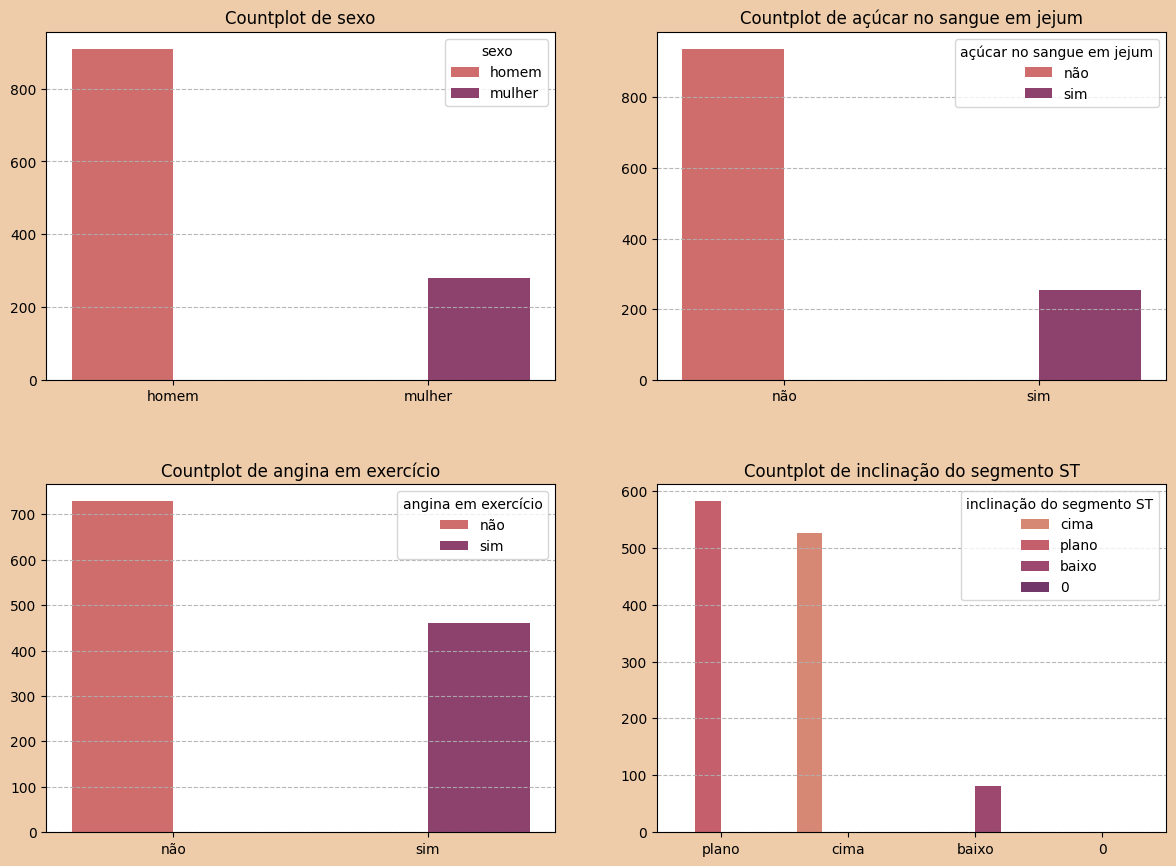

In [11]:
# Crie a estrutura de subplots.
fig, axes = plt.subplots(2, 2, figsize = (14, 10), gridspec_kw = {'wspace': 0.2, 'hspace': 0.3})

# Formata background, paleta e fontes
bg_color = "#ECA"
c_palette = 'flare'

# Definir cor de fundo da figura.
fig.set_facecolor(bg_color)

# Linha 0 - Countplots.
sns.countplot(data = df, x = 'sexo', palette = c_palette, hue = 'sexo',
              ax = axes[0, 0], order = df['sexo'].value_counts().index)
axes[0, 0].set_title('Countplot de sexo', fontsize = 12)
axes[0, 0].set_xlabel('', fontsize = 8)
axes[0, 0].set_ylabel('', fontsize = 8)
axes[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

sns.countplot(data = df, x = 'açúcar no sangue em jejum', palette = c_palette,
              hue = 'açúcar no sangue em jejum', ax = axes[0, 1], order = df['açúcar no sangue em jejum'].value_counts().index)
axes[0, 1].set_title('Countplot de açúcar no sangue em jejum', fontsize = 12)
axes[0, 1].set_xlabel('', fontsize = 8)
axes[0, 1].set_ylabel('', fontsize = 8)
axes[0, 1].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

# Linha 1 - Countplots.
sns.countplot(data = df, x = 'angina em exercício', palette = c_palette, hue = 'angina em exercício',
              ax = axes[1, 0], order = df['angina em exercício'].value_counts().index)
axes[1, 0].set_title('Countplot de angina em exercício', fontsize = 12)
axes[1, 0].set_xlabel('', fontsize = 8)
axes[1, 0].set_ylabel('', fontsize = 8)
axes[1, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

sns.countplot(data = df, x = 'inclinação do segmento ST', palette = c_palette, hue = 'inclinação do segmento ST',
              ax = axes[1, 1], order = df['inclinação do segmento ST'].value_counts().index)
axes[1, 1].set_title('Countplot de inclinação do segmento ST', fontsize=12)
axes[1, 1].set_xlabel('', fontsize = 8)
axes[1, 1].set_ylabel('', fontsize = 8)
axes[1, 1].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

# Exibe o gráfico.
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

## 2. Perguntas de partida e hipóteses

#### 1 - Qual a relação entre a colesterol e a presença de doenças cardíacas?

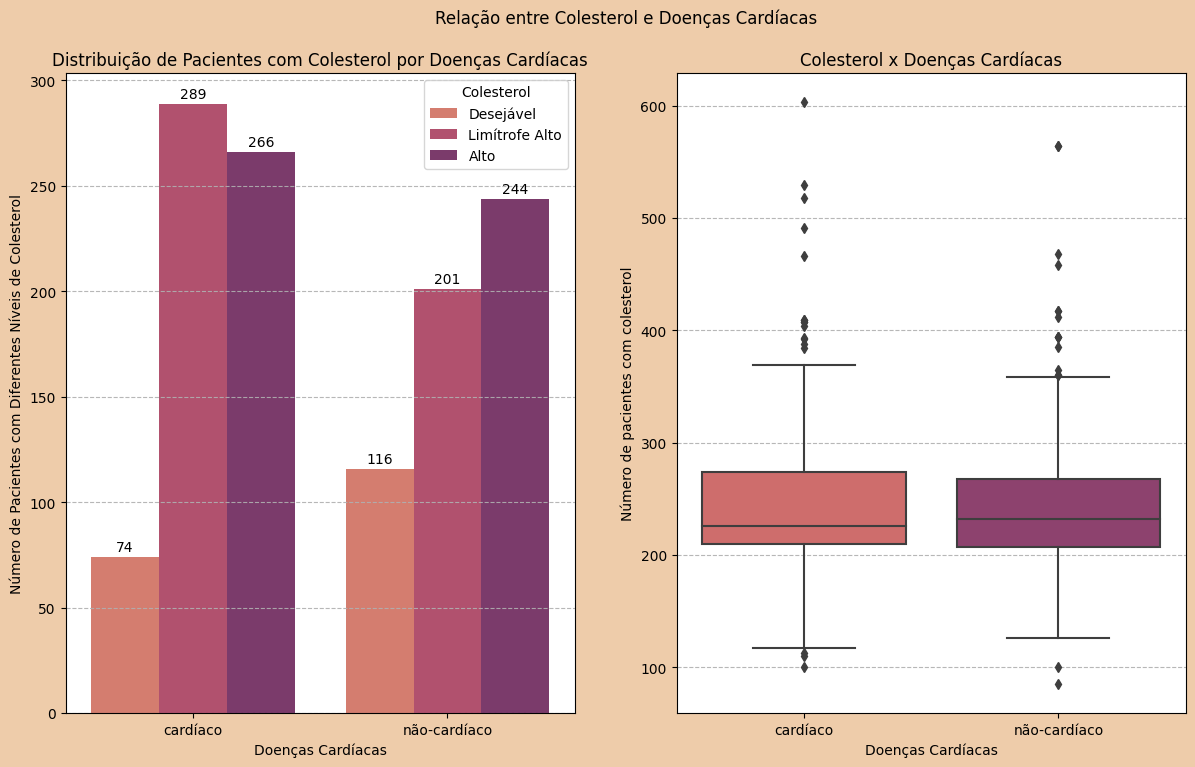

In [12]:
# Crie a estrutura de subplots
fig, axes = plt.subplots(1,2 , figsize = (14, 8), gridspec_kw = {'wspace': 0.2, 'hspace': 0.3})

# Definir cor de fundo da figura, paleta e fontes.
fig.set_facecolor(bg_color)
bg_color = "#ECA"
c_palette = 'flare'

#Título do gráfico
plt.suptitle("Relação entre Colesterol e Doenças Cardíacas")

#Agrupamento do colesterol e o alvo, size = retorna os valores
contagem = df.groupby(['colesterol', 'alvo']).size()

# Definindo intervalos para colesterol, segundo OMS
df['colesterol_categoria'] = pd.cut(df['colesterol'], 
                                    bins=[0, 200, 239, float('inf')],
                                    labels=['Desejável', 'Limítrofe Alto', 'Alto'])

# Gráfico de barras
sns.countplot(x='alvo', hue='colesterol_categoria', data=df, palette=c_palette, ax=axes[0],
             order = df['alvo'].value_counts().index)
#legenda
axes[0].set_title("Distribuição de Pacientes com Colesterol por Doenças Cardíacas")
axes[0].set_xlabel("Doenças Cardíacas")
axes[0].set_ylabel("Número de Pacientes com Diferentes Níveis de Colesterol")
#definição das linhas horizontal tracejadas
axes[0].grid(True, axis='y', linestyle='--', alpha=0.9)
#legenda do gráfico
axes[0].legend(title="Colesterol", loc='upper right')

#numeros no topo da barra
for p in axes[0].patches:
    height = round(p.get_height())  
    axes[0].annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 7), 
                     textcoords='offset points')

#Gráfico em boxplot
sns.boxplot(x='alvo', y='colesterol', data=df, palette=c_palette, ax = axes[1],
           order = df['alvo'].value_counts().index)
#Legenda
axes[1].set_title("Colesterol x Doenças Cardíacas")
axes[1].set_xlabel("Doenças Cardíacas")
axes[1].set_ylabel("Número de pacientes com colesterol")
#definição das linhas horizontal tracejadas
axes[1].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

# Exibe o gráfico.
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

#### 2 - Quais variáveis têm maior influência sobre o risco de doenças cardíacas (alvo)?

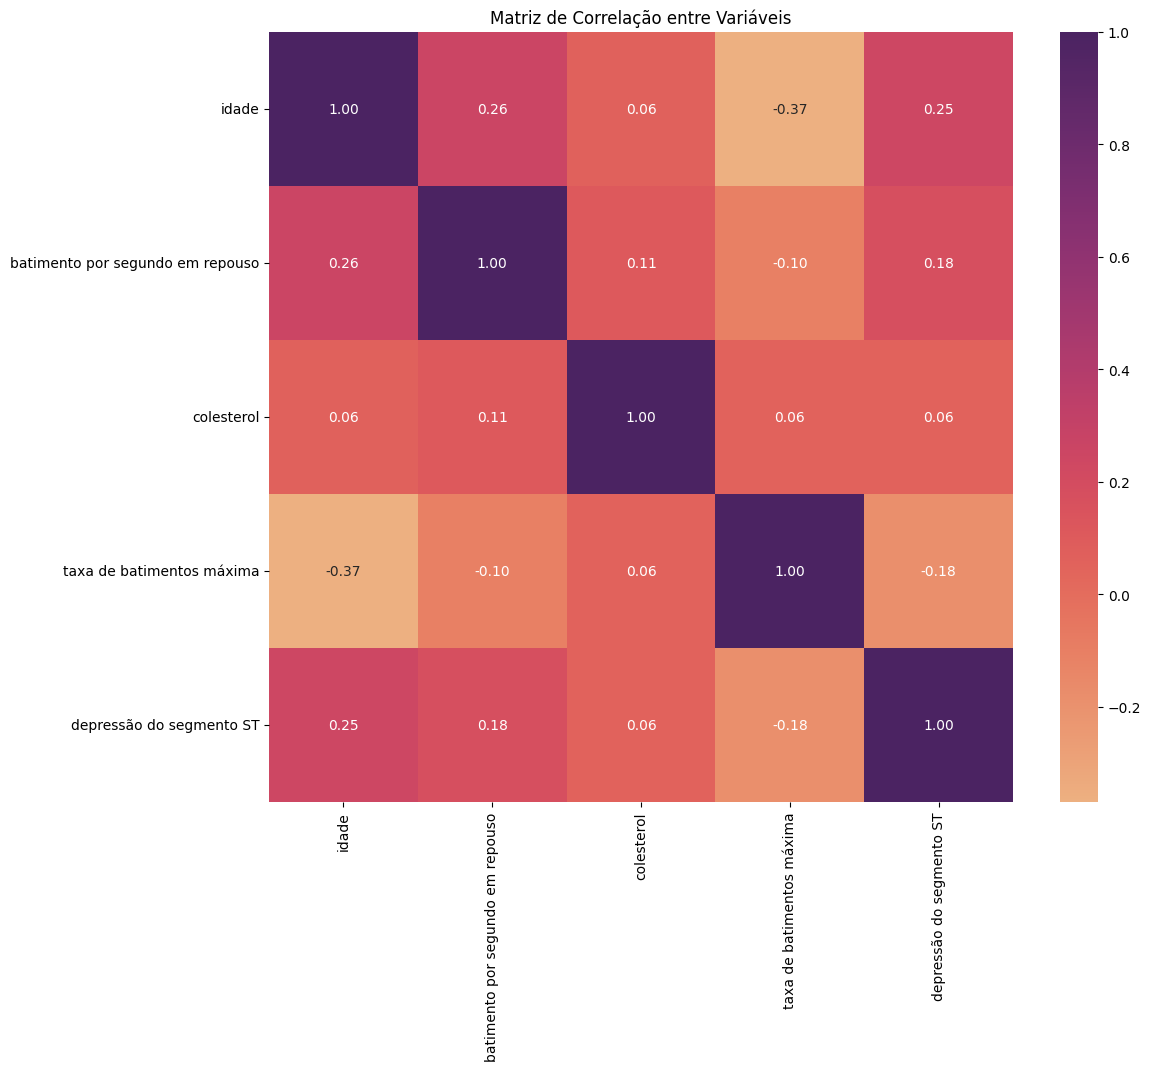

In [13]:
corr_matrix = df.corr(numeric_only=True)

# Plotando o heatmap da correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

#### 3 - É possível que, com a prática de exercícios físicos frequentes, o risco de doenças cardíacas diminua?

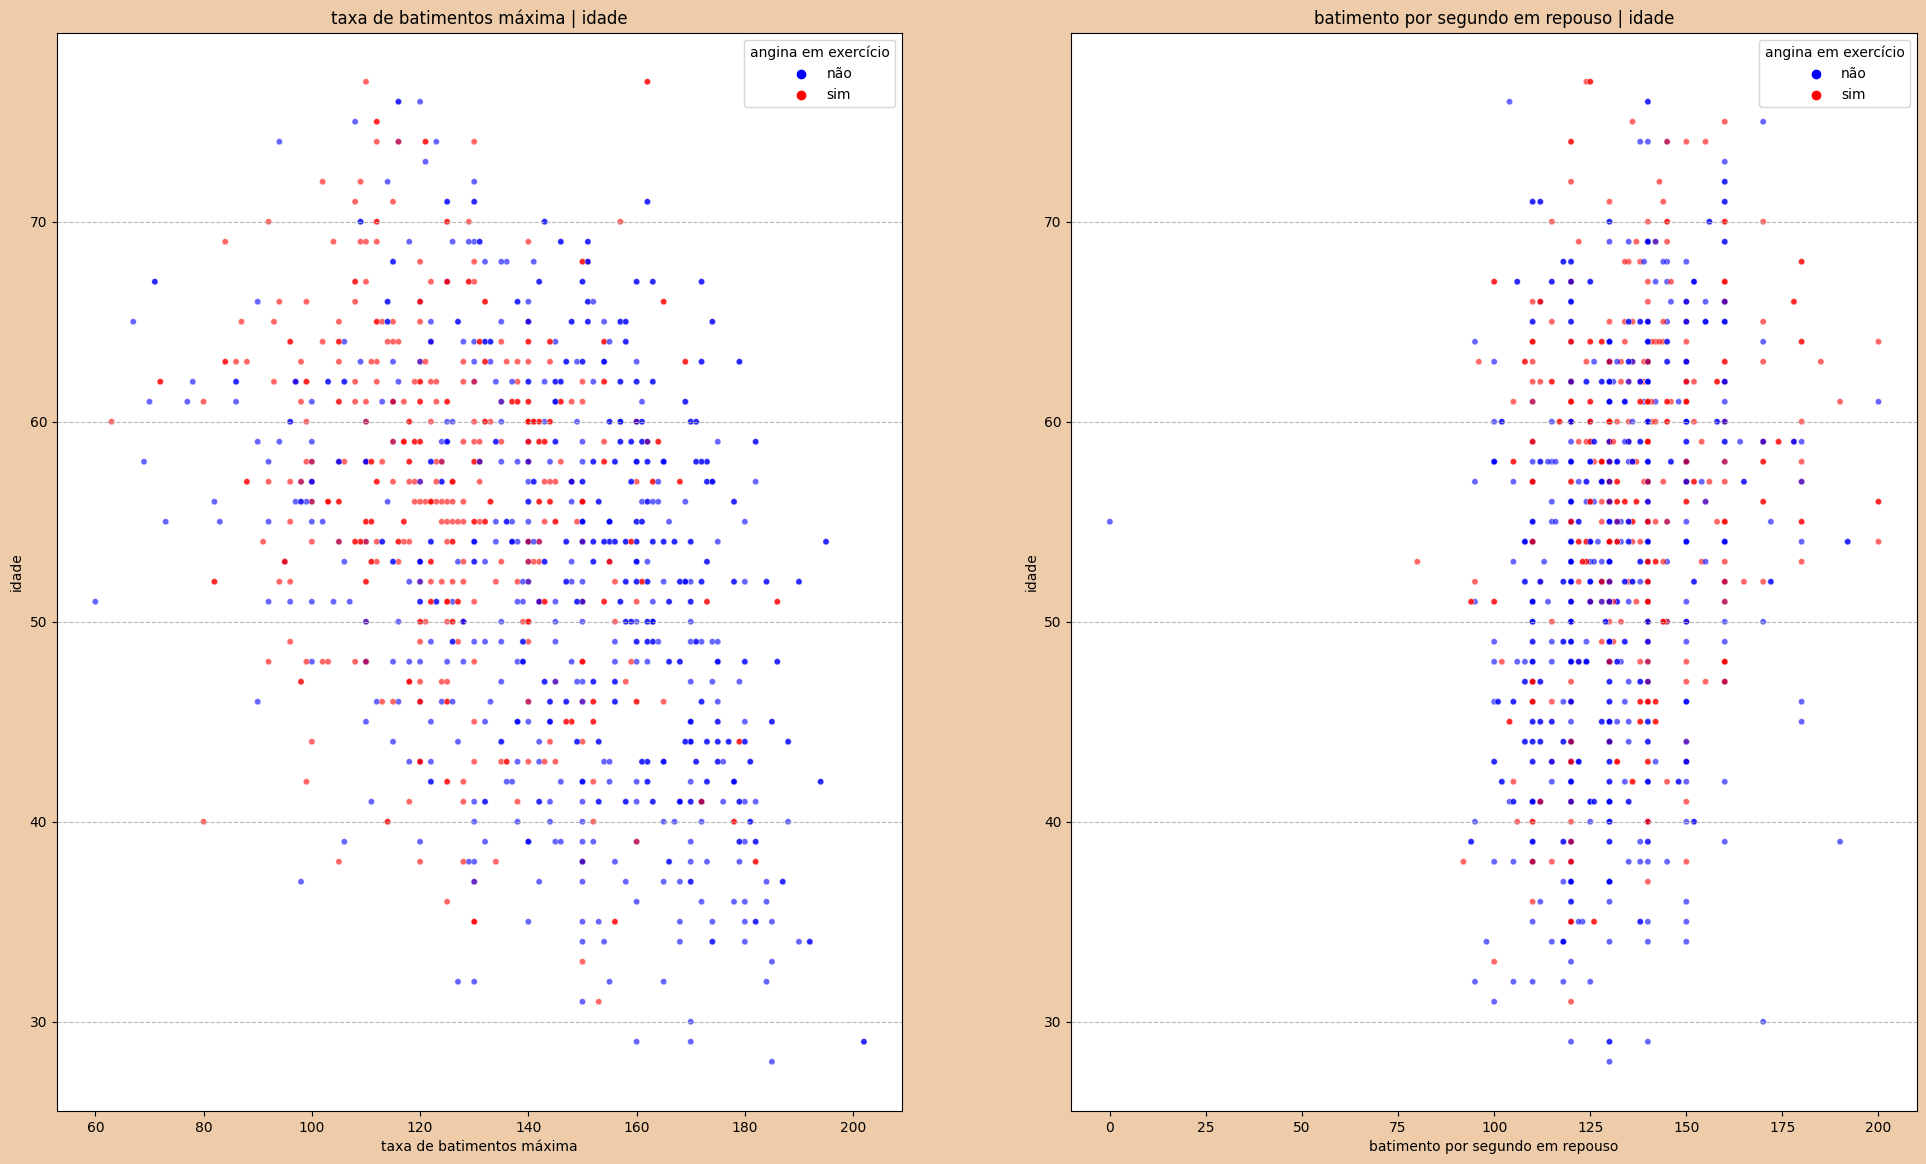

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(24, 14), gridspec_kw={'wspace': 0.2, 'hspace': 0.4})

# Formata background, paleta e fontes.
bg_color = "#ECA"
c_palette = 'flare'

# Definir cor de fundo da figura.
fig.set_facecolor(bg_color)

# Scatter plot de taxas de batimento máximo por idade com alvo de angina em exercício.
sns.scatterplot(data = df, x = 'taxa de batimentos máxima', y = 'idade', hue = 'angina em exercício', ax = axes[0], palette = {'não': "blue", 'sim': "red"}, alpha = 0.6, s = 20)
axes[0].set_title("taxa de batimentos máxima | idade")
axes[0].set_xlabel("taxa de batimentos máxima")
axes[0].set_ylabel("idade")
axes[0].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

# Ajusta os limites dos eixos com uma margem extra.
x_min, x_max = df['taxa de batimentos máxima'].min(), df['taxa de batimentos máxima'].max()
y_min, y_max = df['idade'].min(), df['idade'].max()

# Adiciona 5% de margem em cada lado
axes[0].set_xlim(x_min - 0.05 * (x_max - x_min), x_max + 0.05 * (x_max - x_min))
axes[0].set_ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))

# Scatter plot de taxas de batimento em repouso por idade com alvo de angina em exercício.
sns.scatterplot(data = df, x = 'batimento por segundo em repouso', y = 'idade', hue = 'angina em exercício', ax = axes[1], palette = {'não': "blue", 'sim': "red"}, alpha = 0.6, s = 20)
axes[1].set_title("batimento por segundo em repouso | idade")
axes[1].set_xlabel("batimento por segundo em repouso")
axes[1].set_ylabel("idade")
axes[1].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

# Ajusta os limites dos eixos com uma margem extra.
x_min, x_max = df['batimento por segundo em repouso'].min(), df['batimento por segundo em repouso'].max()
y_min, y_max = df['idade'].min(), df['idade'].max()

# Adiciona 5% de margem em cada lado.
axes[1].set_xlim(x_min - 0.05 * (x_max - x_min), x_max + 0.05 * (x_max - x_min))
axes[1].set_ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))

# Plotando ScatterPlots.
plt.show()

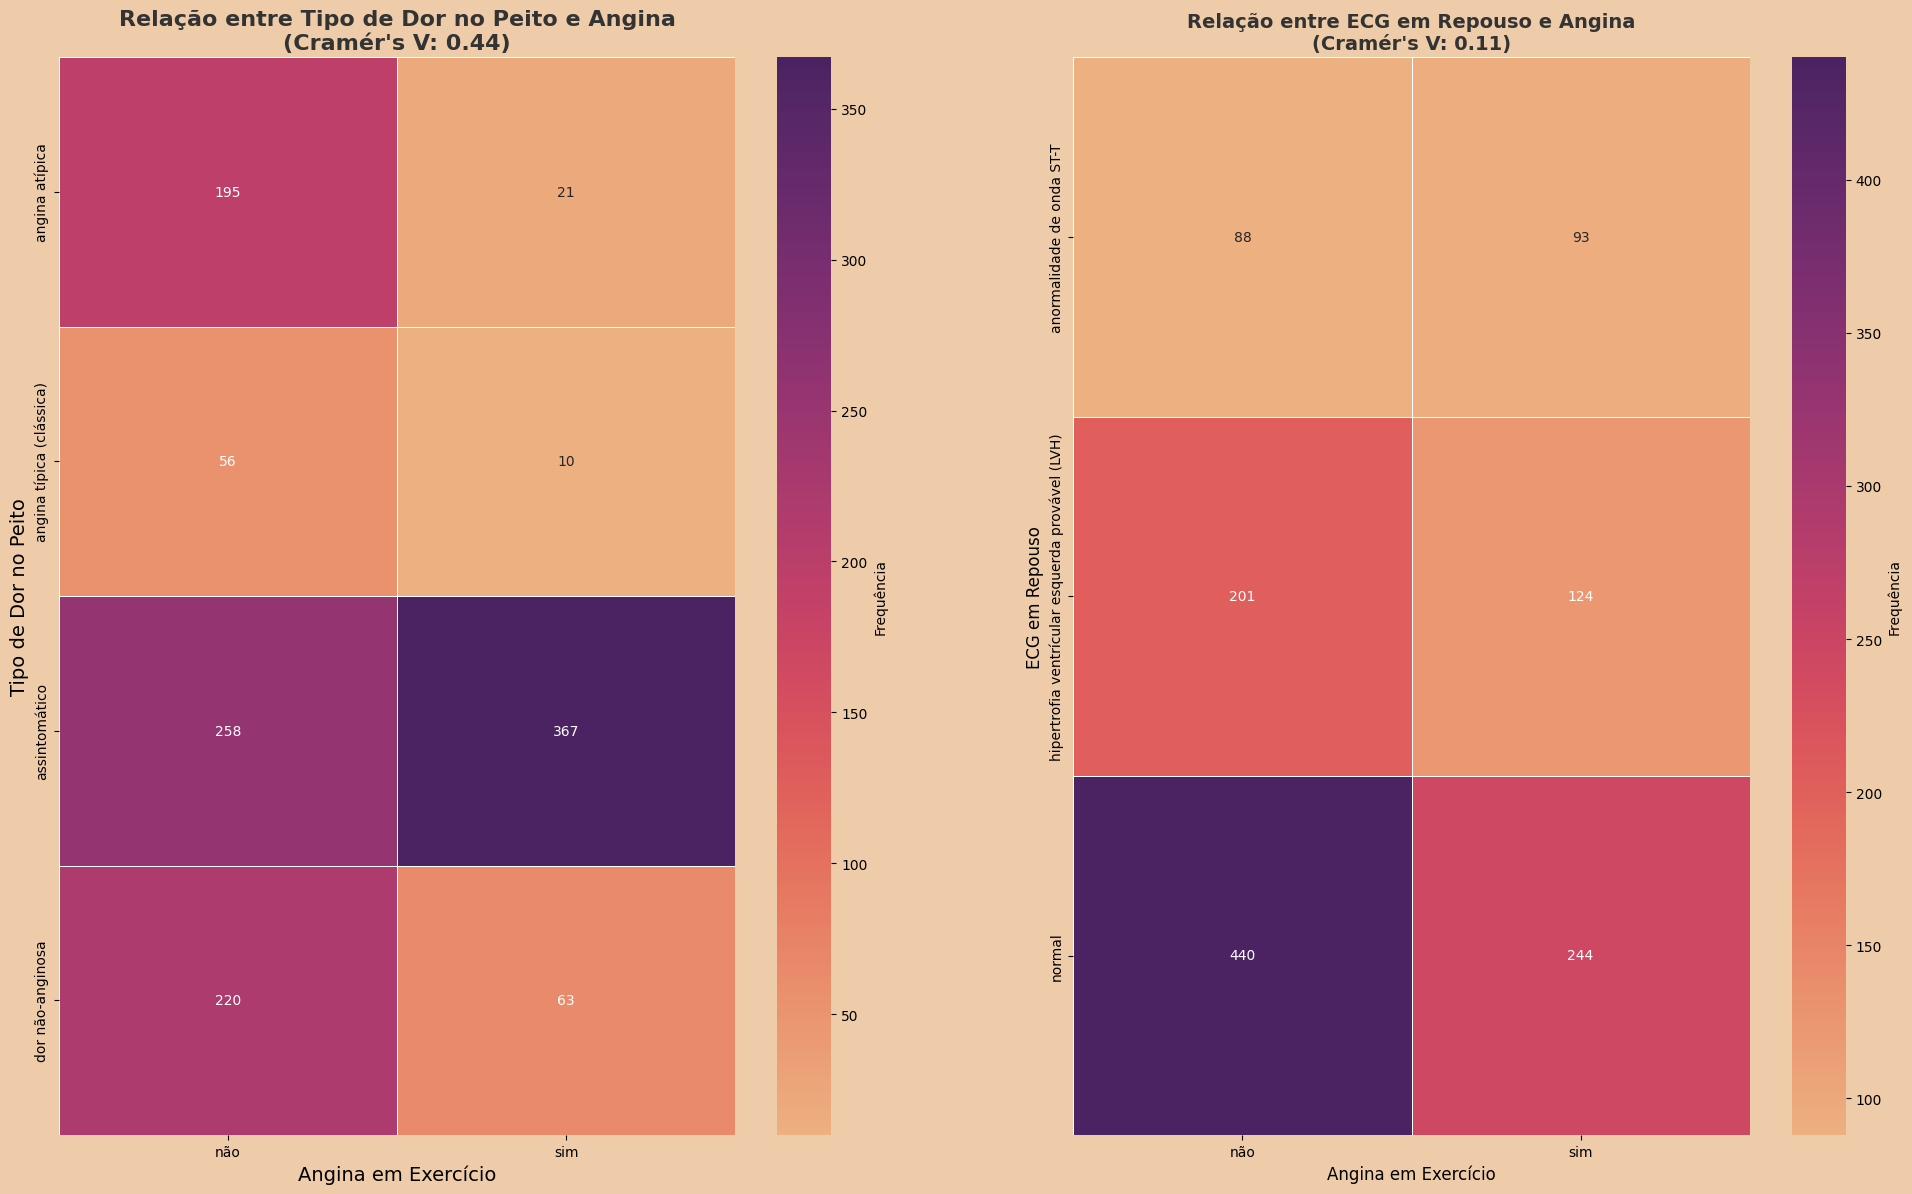

<Figure size 1000x800 with 0 Axes>

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(24, 14), gridspec_kw={'wspace': 0.2, 'hspace': 0.4})

# Formata background, paleta e fontes
bg_color = "#ECA"
c_palette = 'flare'

# Definir cor de fundo da figura.
fig.set_facecolor(bg_color)

# Crie a tabela de contingência
contingency_dor_table = pd.crosstab(df['tipo de dor no peito'], df['angina em exercício'])
contingency_ecg_table = pd.crosstab(df['ECG em repouso'], df['angina em exercício'])

# Função que retorna coeficiente de Cramer.
def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]  
    n = conf_matrix.sum().sum()  
    phi2 = chi2 / n
    r, k = conf_matrix.shape  
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Calcula Cramér's V para a relação entre tipo de dor no peito e angina em exercício
cramers_v_dor = cramers_v(contingency_dor_table)

# Calcula Cramér's V para a relação entre ECG em repouso e angina em exercício
cramers_v_ecg = cramers_v(contingency_ecg_table)

# Visualiza a tabela de contingência com um Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(
    contingency_dor_table,
    annot = True,
    fmt = "d",
    cmap = c_palette,
    linewidths = .5,
    cbar_kws = {"label": "Frequência"},
    ax = axes[0]
)
axes[0].set_title(f"Relação entre Tipo de Dor no Peito e Angina\n(Cramér's V: {cramers_v_dor:.2f})",
                  fontsize=16, fontweight='bold', color="#333333")
axes[0].set_xlabel("Angina em Exercício", fontsize=14)
axes[0].set_ylabel("Tipo de Dor no Peito", fontsize=14)

sns.heatmap(
    contingency_ecg_table,
    annot=True,
    fmt="d",
    cmap="flare",
    linewidths=.5,
    cbar_kws={"label": "Frequência"},
    ax=axes[1]
)
axes[1].set_title(f"Relação entre ECG em Repouso e Angina\n(Cramér's V: {cramers_v_ecg:.2f})",
                  fontsize=14, fontweight='bold', color="#333333")
axes[1].set_xlabel("Angina em Exercício", fontsize=12)
axes[1].set_ylabel("ECG em Repouso", fontsize=12)

# Exibe o gráfico.
plt.show()

#### 4 - Quais padrões podem ser encontrados que indiquem populações de alto risco?

## 3. Insights